<a href="https://colab.research.google.com/github/hyeji-K/AI_example/blob/main/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80_%EA%B3%B5%EB%B6%80%ED%95%98%EB%A9%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A4%80%EB%B9%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **머신러닝의 기초를 다집니다 - 수치 예측**

In [2]:
# 1차 함수로 이해하는 선형 회귀
# y = ax + b
# 선형 회귀는 기울기와 절편을 찾아줍니다 (x는 입력이고 y는 타깃)
# 직선은 모델이라고 함 모델을 통해 예측 가능함
# 머신 러닝은 x, y가 주어질 때 기울기와 절편을 구합니다. (규칙 찾기)

# 문제 해결을 위해 당뇨병 환자의 데이터 준비하기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes() # Bunch 클래스

print(diabetes.data.shape, diabetes.target.shape) # data == 입력 데이터, target == 타깃 데이터) shape는 넘파이의 크기
# ( ... ) -> 튜플 튜플은 원소가 하나일때 반드시 콤마를 써줘야함

(442, 10) (442,)


#### **샘플과 특성**
보통 행에 샘플, 열에 특성
처음에는 특성을 하나 혹은 두개만 사용해 볼 예정

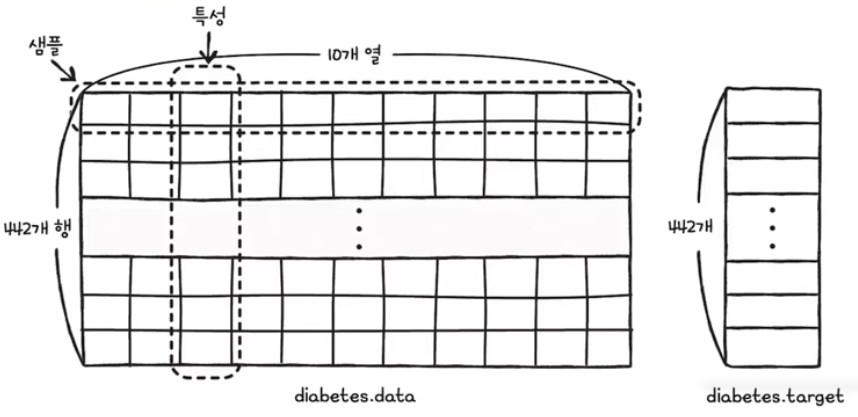

In [2]:
diabetes.data[0:3] # 슬라이싱 연산자를 사용해서 어떤 데이터가 들어있는지 확인해 볼 수 있음

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [3]:
diabetes.target[:3]

array([151.,  75., 141.])

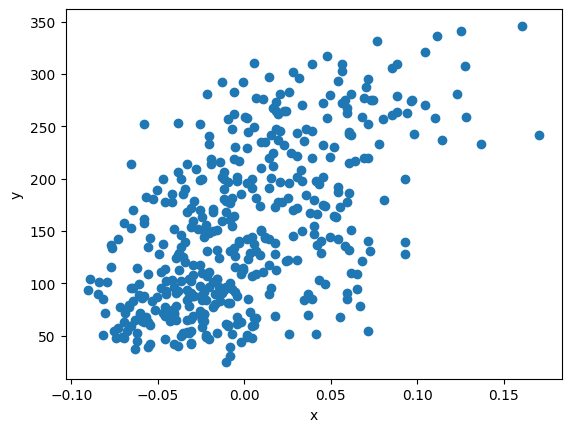

In [4]:
# [산점도] 시각화하기
import matplotlib.pyplot as plt
x = diabetes.data[:, 2] # 입력데이터
y = diabetes.target # 타깃데이터
plt.scatter(x, y) # data[첫번째데이터, 두번째데이터] 모든 행에 대한 데이터에서 세번째 특성만 가져온다
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### **경사 하강법으로 학습하는 방법**
- 딥러닝에서 경사 하강법이 아주 중요!
- 직선의 방정식을 경사 하강법으로 찾을 것임

타깃과 예측값
- y = ax + b
- y^*(예측값)* = wx + b *(w = 가중치)*


**훈련 데이터에 잘 맞는 w와 b를 찾는 방법 (경사 하강법의 기본적인 방법)**
1. 무작위로 w와 b를 정합니다 (무작위로 모델 만들기)
2. x에서 샘플 하나를 선택하여 y^을 계산합니다 (무작위로 모델 예측하기)
3. y^과 선택한 샘플의 진짜 y를 비교합니다 (예측한 값과 진짜 정답 비교하기, 틀릴 확률 99%)
4. y^이 y와 더 가까워지도록 w, b를 조정합니다 (모델 조정하기)
5. 모델 샘플을 처리할 때까지 다시 2 ~ 4 항목을 반복합니다

In [6]:
w = 1.0
b = 1.0

In [7]:
# 첫 번째 샘플에 대한 예측 만들기
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186832


In [10]:
print(y[0]) # 첫 번째 샘플의 실제 타깃

151.0


In [8]:
# y_hat과 y[0]의 둘의 차이 줄이기!
# w 값을 조절해 예측값을 바꿔보기
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705517


In [12]:
print(y[0])

151.0


In [14]:
# 예측이 늘어난 비율을 확인해보자
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate) # 변화율 == x[0] (x의 값)

0.06169620651868429


##### **변화율을 보고 w를 어떻게 바꾸어야 할지 알 수 있나요?**
샘플의 값이 바로 변화율이 됩니다

변화율이 양수이면 y_hat도 증가하게 됩니다

- 앞선 결과에서 y >> y_nat 이기 때문에 w가 증가해야 함
- x[0]가 0 보다 작으면 w을 증가시킬지, 감소시킬지 판단을 내려야 함

#### **변화율 부호에 따라 가중치를 업데이트하는 방법**



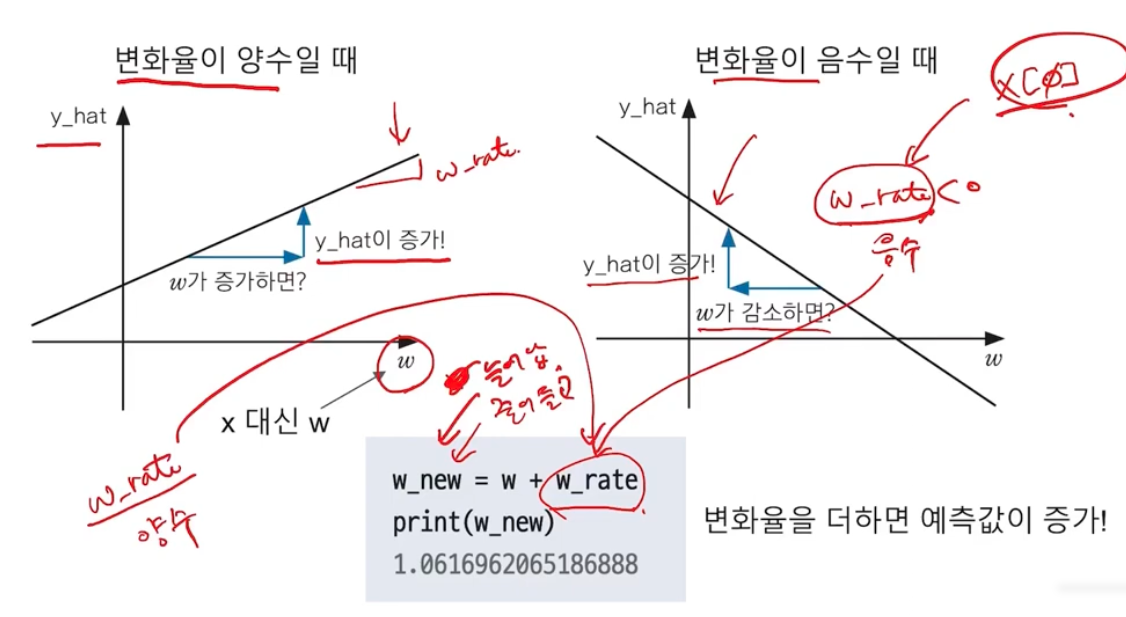

In [15]:
# w_rate이 음수이든 양수이든 우리가 원하는 방향으로 w_new가 만들어짐
# w_rate이 양수이면 w_new가 늘어나는 방향으로 증가, 음수여도 y_hat이 늘어나는 방향으로 증가
w_new = w + w_rate # y_hat < y 를 가정하고
print(w_new)

1.0616962065186843


In [16]:
# 변화율로 절편 업데이트하기
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186833


In [17]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate) # b_rate == 항상 1

1.0


In [18]:
# y_hat < y 를 가정하고
b_new = b + 1
print(b_new)

2.0


#### **이 방식에 어떤 문제점이 있을까요?**
y_hat이 y에 한참 미치지 못하는 값인 경우, w와 b를 더 큰 폭으로 수정할 수 없음 (앞에서 변화율 만큼 수정을 했지만 특별한 기준을 정하기가 어려움)

y_hat이 y보다 커지면 y_hat을 감소시키지 못함

- y_hat과 y의 차이가 크면 w와 b를 그에 비례해서 바꿔야 함 --> 빠르게 솔루션에 수렴
- y_hat이 y보다 크면 w와 b를 감소시켜야 함 --> y_hat과 y 값에 능동적으로 대처


#### 오차 역전파로 가중치와 절편을 업데이트합니다
- 오차와 변화율을 곱하여 가중치를 업데이트
- y > y_hat --> err는 양수 -> w_new 증가
- y < y_hat --> err는 음수 -> w_new 줄어듬
- 오차의 크기에 따라 많은 폭으로 변동시킬 수 있음

여기에서 역전파는 오차 * 변화율로 생각하면 됨!

In [22]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new) # (1.0616962065186843, 2.0) 이전의 값보다 큰 폭으로 바뀐 것을 확인할 수 있음

10.250624555903848 150.9383037934813


In [24]:
# 두 번쨰 샘플을 사용하여 w와 b를 계산합니다
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [25]:
# 전체 샘플을 반복하여 가중치와 절편을 조정하기
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


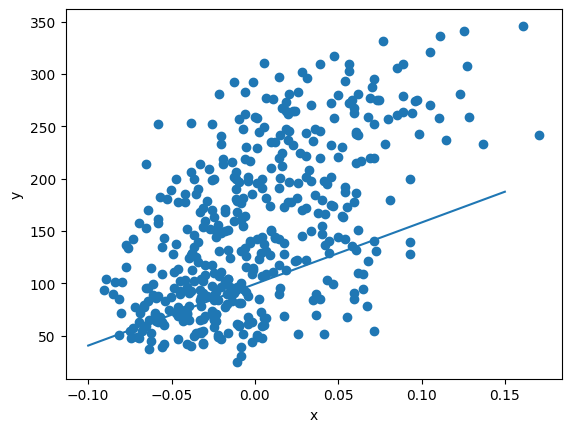

In [26]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
# 위의 과정을 여러 번 반복해서 좋은 모델 찾기
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)
# 경사 하강법으로 찾은 선형 회귀 모델
# y^ = 913.6x + 123.4

913.5973364346786 123.39414383177173


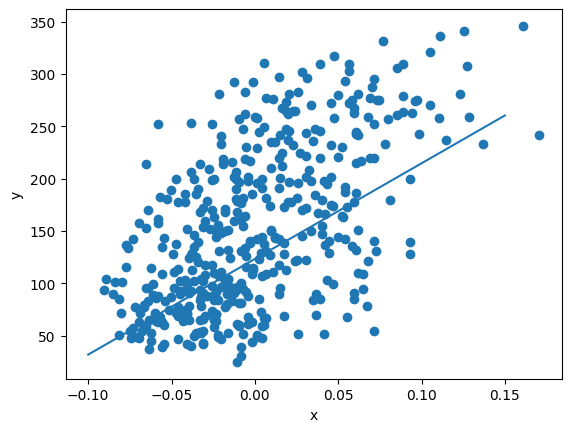

In [10]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
# 모델로 예측하기
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643900139


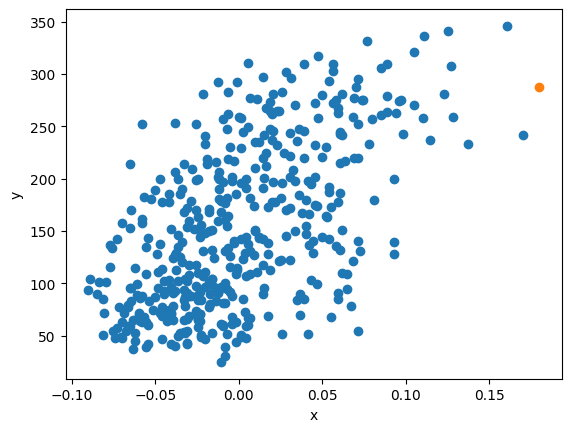

In [12]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 지금까지 실습 내용 정리
1. w와 b의 임의의 값 (1.0, 1.0)으로 초기화하고 훈련 데이터의 샘플을 하나씩 대입하여 y와 y^의 오차를 구합니다
2. 1에서 구한 오차를 w와 b의 변화율에 곱하고 이 값을 이용하여 w와 b를 업데이트합니다
3. 만약 y^이 y보다 커지면 오차는 음수가 되어 자동으로 w와 b가 줄어드는 방향으로 업데이트됩니다
4. 반대로 y^이 y보다 작으면 오차는 양수가 되고 w와 b는 더 커지도록 업데이트됩니다